# Dataset 1 : Customer Demographic analysis

In [1]:
# Get all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# display all the sheets in the Excel file
kmpg = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
kmpg.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [3]:
# read the CustomerDemographic sheet from the excel file
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="CustomerDemographic")
list(df)

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12']

In [4]:
# rename for easier analysis
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"first_name",
                   "Unnamed: 2":"last_name",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3year_purchases",
                   "Unnamed: 5":"dob",
                   "Unnamed: 6":"job",
                   "Unnamed: 7":"job_category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"deceased_indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tenure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [5]:
# number of null values of each attribute
df.isnull().sum()

customer_id             0
first_name              0
last_name             125
gender                  0
3year_purchases         0
dob                    87
job                   506
job_category          656
wealth_segement         0
deceased_indicator      0
default               302
owns_car                0
tenure                 87
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         4000 non-null   object
 1   first_name          4000 non-null   object
 2   last_name           3875 non-null   object
 3   gender              4000 non-null   object
 4   3year_purchases     4000 non-null   object
 5   dob                 3913 non-null   object
 6   job                 3494 non-null   object
 7   job_category        3344 non-null   object
 8   wealth_segement     4000 non-null   object
 9   deceased_indicator  4000 non-null   object
 10  default             3698 non-null   object
 11  owns_car            4000 non-null   object
 12  tenure              3913 non-null   object
dtypes: object(13)
memory usage: 406.4+ KB


In [7]:
# identifying duplicate values
dup = df.duplicated()
df[dup].sum()

customer_id           0.0
first_name            0.0
last_name             0.0
gender                0.0
3year_purchases       0.0
dob                   0.0
job                   0.0
job_category          0.0
wealth_segement       0.0
deceased_indicator    0.0
default               0.0
owns_car              0.0
tenure                0.0
dtype: float64

In [8]:
# value counts of gender attribute
df['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [9]:
# replace inconsistent values with appropriate values
df['gender'] = df['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')
df['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

Text(0, 0.5, 'Number of people')

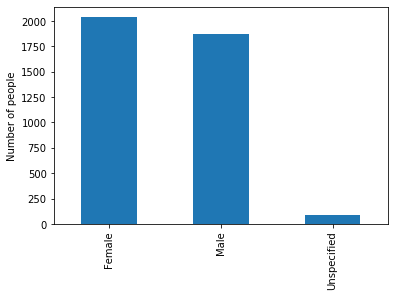

In [10]:
# gender value counts visualization
df.gender.value_counts().plot(kind='bar')
plt.ylabel('Number of people')

In [11]:
# coverting attribute to float for analysis
df['3year_purchases'] = df['3year_purchases'].astype(float)

In [12]:
# 3 year purchase percentage by gender
df.groupby('gender')['3year_purchases'].sum()/df['3year_purchases'].sum()

gender
Female         0.502961
Male           0.478027
Unspecified    0.019012
Name: 3year_purchases, dtype: float64

Text(0.5, 0, 'Gender')

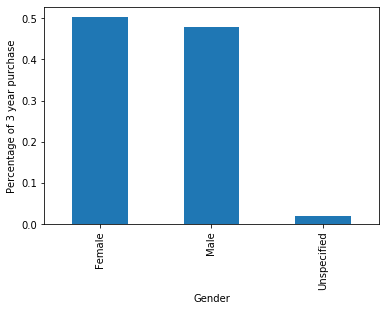

In [13]:
# 3 year purchase percentage by gender visualization
(df.groupby('gender')['3year_purchases'].sum()/df['3year_purchases'].sum()).plot(kind='bar')
plt.ylabel('Percentage of 3 year purchase')
plt.xlabel('Gender')

Text(0, 0.5, 'Number of people')

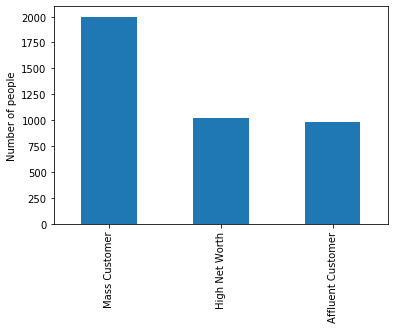

In [14]:
# number of people in each wealth category visualization
df.wealth_segement.value_counts().plot(kind='bar')
plt.ylabel('Number of people')

In [15]:
# 3 year purchase of wealth segments as percentages
df.groupby('wealth_segement')['3year_purchases'].sum()/df['3year_purchases'].sum()

wealth_segement
Affluent Customer    0.244539
High Net Worth       0.246886
Mass Customer        0.508575
Name: 3year_purchases, dtype: float64

Text(0.5, 0, 'Wealth Segment')

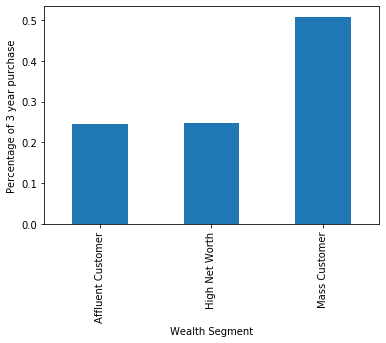

In [16]:
# 3 year purchase of wealth segments as percentages visualization
(df.groupby('wealth_segement')['3year_purchases'].sum()/df['3year_purchases'].sum()).plot(kind='bar')
plt.ylabel('Percentage of 3 year purchase')
plt.xlabel('Wealth Segment')

Text(0.5, 0, 'Wealth Segment')

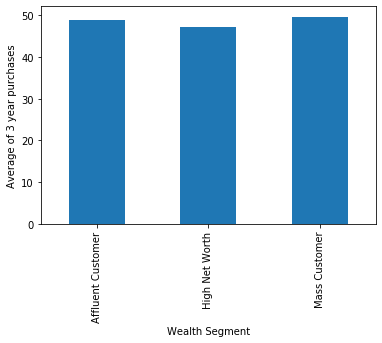

In [17]:
# Average 3 year purchase of wealth segments
(df.groupby('wealth_segement')['3year_purchases'].mean().plot(kind='bar'))
plt.ylabel('Average of 3 year purchases')
plt.xlabel('Wealth Segment')

In [18]:
# number of people in different job categories
df['job_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_category, dtype: int64

Text(0.5, 0, 'Job Category')

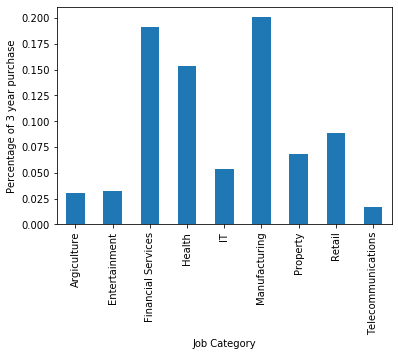

In [19]:
# 3 year purchase of people in different job categories as percentages
(df.groupby('job_category')['3year_purchases'].sum()/df['3year_purchases'].sum()).plot(kind='bar')
plt.ylabel('Percentage of 3 year purchase')
plt.xlabel('Job Category')

In [20]:
# how many people owns car
df['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

Text(0, 0.5, '3 year purchase')

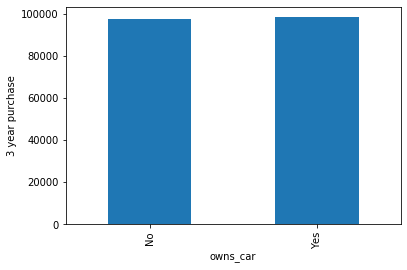

In [21]:
# 3 year purchase of people having or not having cars
(df.groupby('owns_car')['3year_purchases'].sum()).plot(kind='bar')
plt.ylabel('3 year purchase')

# Dataset 2: New Customer analysis

In [49]:
df2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="NewCustomerList")
list(df2)

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22']

In [50]:
# rename for easier analysis
df2.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"first_name"}, inplace = True)
df2.rename(columns={"Unnamed: 1":"last_name",
                   "Unnamed: 2":"gender",
                   "Unnamed: 3":"3year_purchases",
                   "Unnamed: 4":"dob",
                   "Unnamed: 5":"job",
                   "Unnamed: 6":"job_category",
                   "Unnamed: 7":"wealth_segement",
                   "Unnamed: 8":"deceased_indicator",
                   "Unnamed: 9":"owns_car",
                   "Unnamed: 10":"tenure",
                   "Unnamed: 11":"address",
                   "Unnamed: 12":"post_code",
                   "Unnamed: 13":"state",
                   "Unnamed: 14":"country",
                   "Unnamed: 15":"property_val",
                   "Unnamed: 21":"rank",
                   "Unnamed: 22":"value"}, inplace = True)
df2=df2.iloc[1:]
df2

,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,owns_car,...,state,country,property_val,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,rank,value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.70312
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4.0,4,1.70312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [51]:
# number of null values of each attribute
df2.isnull().sum()

first_name              0
last_name              29
gender                  0
3year_purchases         0
dob                    17
job                   106
job_category          165
wealth_segement         0
deceased_indicator      0
owns_car                0
tenure                  0
address                 0
post_code               0
state                   0
country                 0
property_val            0
Unnamed: 16             0
Unnamed: 17             0
Unnamed: 18             0
Unnamed: 19             0
Unnamed: 20             0
rank                    0
value                   0
dtype: int64

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_name          1000 non-null   object 
 1   last_name           971 non-null    object 
 2   gender              1000 non-null   object 
 3   3year_purchases     1000 non-null   object 
 4   dob                 983 non-null    object 
 5   job                 894 non-null    object 
 6   job_category        835 non-null    object 
 7   wealth_segement     1000 non-null   object 
 8   deceased_indicator  1000 non-null   object 
 9   owns_car            1000 non-null   object 
 10  tenure              1000 non-null   object 
 11  address             1000 non-null   object 
 12  post_code           1000 non-null   object 
 13  state               1000 non-null   object 
 14  country             1000 non-null   object 
 15  property_val        1000 non-null   object 
 16  Unname

In [53]:
# drop unnamed columns
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
df2 = df2.drop(cols, axis=1)

In [54]:
# Replace gender 'U' with 'Unspecified'
df2['gender'].str.replace('U','Unspecified')

1         Male
2         Male
3       Female
4       Female
5       Female
         ...  
996       Male
997       Male
998     Female
999       Male
1000      Male
Name: gender, Length: 1000, dtype: object

In [55]:
# coverting attribute to float for analysis
df2['3year_purchases'] = df2['3year_purchases'].astype(float)

Text(0.5, 0, 'State')

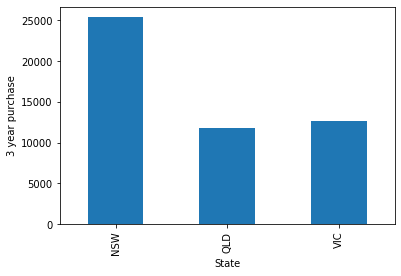

In [56]:
# 3 year purchase of people from different states
(df2.groupby('state')['3year_purchases'].sum()).plot(kind='bar')
plt.ylabel('3 year purchase')
plt.xlabel('State')

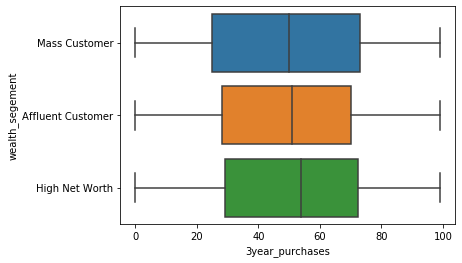

In [57]:
# box plot of purchases vs wealth segment
sns.boxplot(y='wealth_segement',x='3year_purchases',data=df2)

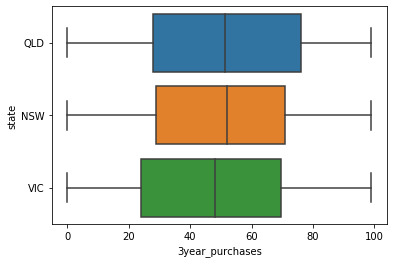

In [58]:
# box plot of purchases vs state
sns.boxplot(y='state',x='3year_purchases',data=df2)

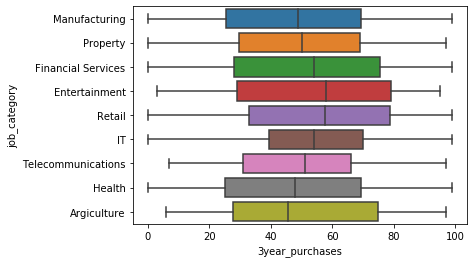

In [59]:
# box plot of purchases vs job category
sns.boxplot(y='job_category',x='3year_purchases',data=df2)

# Transactions Table Analysis

In [33]:
df3 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="Transactions")
list(df3)

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12']

In [34]:
# rename for easier analysis
df3.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"transaction_id"}, inplace = True)
df3.rename(columns={"Unnamed: 1":"product_id",
                   "Unnamed: 2":"customer_id",
                   "Unnamed: 3":"transaction_date",
                   "Unnamed: 4":"online_order",
                   "Unnamed: 5":"order_status",
                   "Unnamed: 6":"brand",
                   "Unnamed: 7":"product_line",
                   "Unnamed: 8":"product_class",
                   "Unnamed: 9":"product_size",
                   "Unnamed: 10":"list_price",
                   "Unnamed: 11":"cost",
                   "Unnamed: 12":"fs_date"}, inplace = True)
df3=df3.iloc[1:]
df3

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,cost,fs_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [35]:
# number of null values of each attribute
df3.isnull().sum()

transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        360
order_status          0
brand               197
product_line        197
product_class       197
product_size        197
list_price            0
cost                197
fs_date             197
dtype: int64

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    20000 non-null  object
 1   product_id        20000 non-null  object
 2   customer_id       20000 non-null  object
 3   transaction_date  20000 non-null  object
 4   online_order      19640 non-null  object
 5   order_status      20000 non-null  object
 6   brand             19803 non-null  object
 7   product_line      19803 non-null  object
 8   product_class     19803 non-null  object
 9   product_size      19803 non-null  object
 10  list_price        20000 non-null  object
 11  cost              19803 non-null  object
 12  fs_date           19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [37]:
# identifying duplicated values
dup = df3.duplicated()
df3[dup].sum()

transaction_id      0.0
product_id          0.0
customer_id         0.0
transaction_date    0.0
online_order        0.0
order_status        0.0
brand               0.0
product_line        0.0
product_class       0.0
product_size        0.0
list_price          0.0
cost                0.0
fs_date             0.0
dtype: float64

In [38]:
# order status counts
df3['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

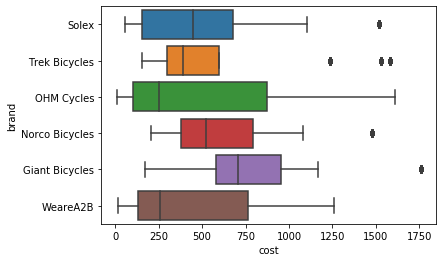

In [39]:
# box plot of brand vs cost
sns.boxplot(y='brand',x='cost',data=df3)

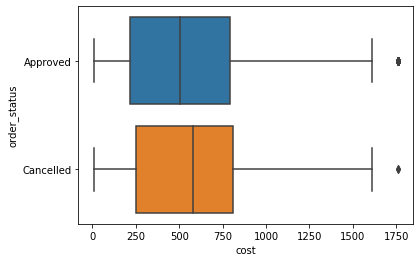

In [40]:
# box plot of brand vs cost
sns.boxplot(y='order_status',x='cost',data=df3)

# Merge all customer information into one table

In [41]:
# number of 'Customer Id' in df 
df['customer_id'].iloc[-1]

4000

In [60]:
# We need to add 'Customer Id' attribute to df2 to enable us merge the tables vertically
df2.insert(0, 'customer_id', range(4001, 4001 + len(df2)))

In [61]:
df2.head()

,customer_id,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,owns_car,tenure,address,post_code,state,country,property_val,rank,value
1,4001,Chickie,Brister,Male,86.0,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,4002,Morly,Genery,Male,69.0,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,4003,Ardelis,Forrester,Female,10.0,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,4004,Lucine,Stutt,Female,64.0,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
5,4005,Melinda,Hadlee,Female,34.0,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [44]:
df4 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name="CustomerAddress")
list(df4)

['Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5']

In [45]:
# rename for easier analysis
df4.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df4.rename(columns={"Unnamed: 1":"address",
                   "Unnamed: 2":"post_code",
                   "Unnamed: 3":"state",
                   "Unnamed: 4":"country",
                   "Unnamed: 5":"property_val"}, inplace = True)
df4=df4.iloc[1:]
df4

,customer_id,address,post_code,state,country,property_val
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [46]:
# replace inconsistent values with appropriate values
df4['state'] = df4['state'].replace('New South Wales','NSW').replace('Victoria','VIC')
df4['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [47]:
# We need to merge df with df4 table before joining with df2
# Merge dataframes using the customer_id column
df = pd.merge(df, df4, how='left', on='customer_id')

In [48]:
df.head()

,customer_id,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,default,owns_car,tenure,address,post_code,state,country,property_val
0,1,Laraine,Medendorp,Female,93.0,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81.0,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61.0,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,17979 Del Mar Point,2448,NSW,Australia,4


In [62]:
#merge df and df2 to produce the single final datafame of all customers
df_final = pd.concat([df, df2], ignore_index=True, sort=False)
df_final

,customer_id,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,default,owns_car,tenure,address,post_code,state,country,property_val,rank,value
0,1,Laraine,Medendorp,Female,93.0,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,060 Morning Avenue,2016,NSW,Australia,10,NaN,NaN
1,2,Eli,Bockman,Male,81.0,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,6 Meadow Vale Court,2153,NSW,Australia,10,NaN,NaN
2,3,Arlin,Dearle,Male,61.0,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,17979 Del Mar Point,2448,NSW,Australia,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60.0,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,NaN,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
4996,4997,Burk,Wortley,Male,22.0,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,NaN,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
4997,4998,Melloney,Temby,Female,17.0,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,NaN,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
4998,4999,Dickie,Cubbini,Male,30.0,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,NaN,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [65]:
# removing attributes which are only present in one of the combined dataframes
df_final = df_final.drop('default',axis=1)
df_final = df_final.drop('rank',axis=1)
df_final = df_final.drop('value',axis=1)

In [66]:
df_final

,customer_id,first_name,last_name,gender,3year_purchases,dob,job,job_category,wealth_segement,deceased_indicator,owns_car,tenure,address,post_code,state,country,property_val
0,1,Laraine,Medendorp,Female,93.0,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81.0,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61.0,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7,0 Holy Cross Court,4211,QLD,Australia,9
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8,17979 Del Mar Point,2448,NSW,Australia,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Ferdinand,Romanetti,Male,60.0,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7
4996,4997,Burk,Wortley,Male,22.0,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10
4997,4998,Melloney,Temby,Female,17.0,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2
4998,4999,Dickie,Cubbini,Male,30.0,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2
